In [94]:
import pandas as pd
import numpy as np

In [1]:
# psycopg2 import
import psycopg2
import psycopg2.extras as extras

In [96]:
# server table 확인
connection_info = "host=147.47.200.145 dbname=teamdb16 user=team16 password=qwer16 port=34543"
conn = psycopg2.connect(connection_info)

try:
    # 테이블을 Pandas.Dataframe으로 추출
    server_df = pd.read_sql('SELECT * FROM citation_data',conn)

except psycopg2.Error as e:
    # 데이터베이스 에러 처리
    print("DB error: ", e)
    
finally:
    # 데이터베이스 연결 해제 필수!!
    conn.close()

/tmp/ipykernel_2535670/3039801870.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  server_df = pd.read_sql('SELECT * FROM citation_data',conn)


In [97]:
server_df

,id,title,venue,year,keywords,fos,refer_doc,n_citation,doc_type,abstract
0,53e99833b7602d97020585a9,Quantifying privacy violations,Secure Data Management,2011,"{""data collector"",""data provider"",""privacy vio...",Database,"{53e9b991b7602d97045820eb,53e99a48b7602d97022a...",21,Conference,Understanding privacy in a data storage enviro...
1,53e99833b7602d97020585b6,Query performance prediction,Inf. Syst.,2006,"{experiments,""information retrieval"",""query pe...",Database,"{558a8b4ce4b0b32fcb3771f5,53e99832b7602d970205...",180,Journal,The prediction of query performance is an inte...
2,53e99833b7602d97020586ef,Glycoconjugate Data Bank : Structures - An Ann...,NUCLEIC ACIDS RESEARCH,2008,"{glycoconjugates,nucleic,""carbohydrate conform...",Database,"{53e99ecab7602d9702795a03,53e99f34b7602d970280...",40,Journal,Glycobiology has been brought to public attent...
3,53e99833b7602d9702058971,Query-sensitive embeddings,SIGMOD Conference,2005,"{""query object"",""additional key words and phra...",Database,"{53e9b16db7602d9703bf7036,557e3021f6678c77ea22...",51,Conference,A common problem in many types of databases is...
4,53e99833b7602d97020594b4,An HTTP-Based Distributed Architecture Support...,SIXTEENTH INTERNATIONAL WORKSHOP ON DATABASE A...,2005,"{groupware,""decentralized system"",""industrial ...",Database,"{557e3b32d19faf961d16819f,53e9a91bb7602d970326...",7,Conference,"In research projects, or in the development of..."
...,...,...,...,...,...,...,...,...,...,...
644795,53e99832b7602d9702055504,Paged similarity queries,Inf. Sci.,2011,"{""forward similarity query"",""query reference"",...",Database,"{53e99991b7602d97021d60a2,53e99afeb7602d970238...",1,Journal,An important feature of a database management ...
644796,53e99832b7602d9702056c6a,Parameterized XPath views,BNCOD,2007,"{""parameterized xpath view"",""relational databa...",Database,"{53e99931b7602d97021700d9,53e99b63b7602d970240...",1,Conference,We present a new approach for accelerating the...
644797,53e99832b7602d970205789b,Query by output,SIGMOD Conference,2009,"{""database d"",""order output query"",""database s...",Database,"{557f9311f6678c77ea22ae0c,53e99832b7602d970205...",185,Conference,It has recently been asserted that the usabili...
644798,53e99832b7602d9702057893,Querying Business Processes,VLDB,2006,"{""paper bp-ql"",""business process specification...",Database,"{53e997e4b7602d9701fde13d,53e99832b7602d970205...",206,Conference,"We present in this paper BP-QL , a novel query..."


In [5]:
fos_list = server_df['fos'].unique()
fos_list

array(['Database', 'Cloud computing', 'Computation', 'Scalability',
       'Multimedia', 'Embedded system', 'The Internet',
       'Machine learning', 'Distributed computing', 'Mathematics'],
      dtype=object)

In [6]:
input_fos = input() # fos_list 중에 선택하기
input_fos 

Machine learning


'Machine learning'

In [7]:
fos_df = server_df[server_df['fos'] == input_fos]
fos_df.reset_index(inplace = True, drop = True)
fos_df

,id,title,venue,year,keywords,fos,refer_doc,n_citation,doc_type,abstract
0,53e997ecb7602d9701fe9635,Active Model Selection,UAI '04 Proceedings of the 20th conference on ...,2012,"{""active learning problem"",""possible model"",""a...",Machine learning,"{53e9be1ab7602d9704ad459e,53e997ecb7602d9701fe...",71,Journal,Classical learning assumes the learner is give...
1,53e997e9b7602d9701fe436b,Bipolar queries revisited,MDAI,2005,"{""aggregation operator"",""broader context"",""ear...",Machine learning,"{53e99a0ab7602d970225c630,53e9a0d2b7602d97029b...",42,Conference,"The concept of bipolar query, recently propose..."
2,53e999a6b7602d97021eddd6,Compressing to VC Dimension Many Points,LECTURE NOTES IN ARTIFICIAL INTELLIGENCE,2003,"{""vc dimension""}",Machine learning,"{53e9a704b7602d970303b828,53e9b693b7602d970420...",34,Conference,\n Any set of labeled examples consistent with...
3,53e99905b7602d970214319f,Model Based Unsupervised Learning Guided by Ab...,ICMLA,2008,"{bioinformatics,""biomedical research""}",Machine learning,"{53e9b500b7602d970403084d,53e99a14b7602d970226...",2,Conference,Time-series segmentation in the fully unsuperv...
4,53e99800b7602d97020122e9,Grammatical Bee Colony.,Lecture Notes in Computer Science,2013,"{""Artificial bee colony"",""Grammatical evolutio...",Machine learning,"{53e99800b7602d9702011dd1,53e9992bb7602d970216...",6,Conference,This paper presents Grammatical Bee Colony alg...
...,...,...,...,...,...,...,...,...,...,...
110519,5e68b99b91e0115a6fd94114,Machine Learning Meteorologist Can Predict Rain,"2019 IEEE 10th Annual Ubiquitous Computing, El...",2019,"{""Weather Prediction"",""Binary Classification"",...",Machine learning,"{5d6651c03a55ac2ba650112b,5736973c6e3b12023e62...",0,Conference,This paper presents the process of predicting ...
110520,5e68b99b91e0115a6fd94169,Event Detection in Noisy Streaming Data with C...,2019 IEEE 5th International Conference on Coll...,2019,"{""concept drift"",""change detection"",nlp,""colla...",Machine learning,"{53e99a85b7602d97022f9bfc,58d82facd649053542fd...",0,Conference,Global physical event detection has traditiona...
110521,5e6b5bf191e01104ed6258c5,On Fault Localization Using Machine Learning T...,2019 International Conference on Frontiers of ...,2019,"{""Software faults"",""Early prediction"",""Softwar...",Machine learning,"{53e9a734b7602d970306ad50,558afa7ce4b031bae1fa...",0,Conference,Early prediction of faulty modules provides a ...
110522,5ea831949fced0a24b741976,Time-Varying Interaction Estimation Using Ense...,2019 IEEE Data Science Workshop (DSW),2019,"{""directed information"",""adaptive directed inf...",Machine learning,"{53e99ed9b7602d97027a4c9c,599c783b601a182cd25a...",2,Conference,Directed information (DI) is a useful tool to ...


In [8]:
fos_year = sorted(fos_df['year'].unique(), reverse = True)
fos_year

[2019,
 2018,
 2017,
 2016,
 2015,
 2014,
 2013,
 2012,
 2011,
 2010,
 2009,
 2008,
 2007,
 2006,
 2005,
 2004,
 2003,
 2002,
 2001,
 2000]

In [9]:
from datetime import datetime
from collections import Counter

In [21]:
start = datetime.now()

k = 10 # top k

result = {}
for y in fos_year:
    
    temp_df = fos_df[fos_df['year'] == y]
    temp_df.reset_index(inplace = True, drop = True)

    top_keyword_list = []

    for i in range(len(temp_df)):
        top_keyword_list.extend(temp_df['keywords'][i][1:-1].split(','))

    # 빈 문자열 제거
    top_keyword_list = [t for t in top_keyword_list if t]
    empty_idx = []

    for i in range(len(top_keyword_list)):

        # 소문자 처리 및 "", '' 것들 지우기
        top_keyword_list[i] = top_keyword_list[i].upper()
        top_keyword_list[i] = top_keyword_list[i].replace('"','')
        top_keyword_list[i] = top_keyword_list[i].replace("'","")

        # 빈 문자열 제거
        if top_keyword_list[i] == '':
            empty_idx.append(i)
            continue

        # 앞 뒤로 {, } 들 지우기 (원래 dict 인 것들)
        if top_keyword_list[i][0] == ' ':
            top_keyword_list[i] = top_keyword_list[i][1:]
        if top_keyword_list[i][-1] == ' ':
            top_keyword_list[i] = top_keyword_list[i][:-1]

    for i in empty_idx:
        del top_keyword_list[i]

    temp_dict = dict(Counter(top_keyword_list))
    temp = sorted(temp_dict.items(), key=lambda x: x[1],reverse = True)
    top_keyword_list = temp[:k] # top 10 keyword extraction

    temp_result = {y:top_keyword_list}
#     temp_result = {y:top_keyword_dict}
    result.update(temp_result)

end = datetime.now()

print(f"elapsed time is {end - start}")
print(result)

elapsed time is 0:00:01.916956
{2019: [('MACHINE LEARNING', 287), ('DEEP LEARNING', 208), ('CLASSIFICATION', 85), ('FEATURE EXTRACTION', 69), ('FEATURE SELECTION', 68), ('NEURAL NETWORKS', 60), ('DATA MINING', 56), ('CONVOLUTIONAL NEURAL NETWORK', 51), ('CONVOLUTIONAL NEURAL NETWORKS', 49), ('NEURAL NETWORK', 45)], 2018: [('MACHINE LEARNING', 424), ('DEEP LEARNING', 327), ('CLASSIFICATION', 187), ('FEATURE SELECTION', 140), ('FEATURE EXTRACTION', 123), ('DATA MINING', 104), ('NEURAL NETWORKS', 99), ('TRAINING', 87), ('CONVOLUTIONAL NEURAL NETWORK', 84), ('OPTIMIZATION', 83)], 2017: [('MACHINE LEARNING', 432), ('DEEP LEARNING', 280), ('CLASSIFICATION', 237), ('FEATURE EXTRACTION', 171), ('FEATURE SELECTION', 168), ('DATA MINING', 164), ('TRAINING', 133), ('NEURAL NETWORKS', 127), ('OPTIMIZATION', 124), ('SUPPORT VECTOR MACHINES', 103)], 2016: [('MACHINE LEARNING', 283), ('CLASSIFICATION', 193), ('FEATURE SELECTION', 157), ('FEATURE EXTRACTION', 146), ('DATA MINING', 138), ('DEEP LEARNIN

In [22]:
dict(result[2019])

{'MACHINE LEARNING': 287,
 'DEEP LEARNING': 208,
 'CLASSIFICATION': 85,
 'FEATURE EXTRACTION': 69,
 'FEATURE SELECTION': 68,
 'NEURAL NETWORKS': 60,
 'DATA MINING': 56,
 'CONVOLUTIONAL NEURAL NETWORK': 51,
 'CONVOLUTIONAL NEURAL NETWORKS': 49,
 'NEURAL NETWORK': 45}

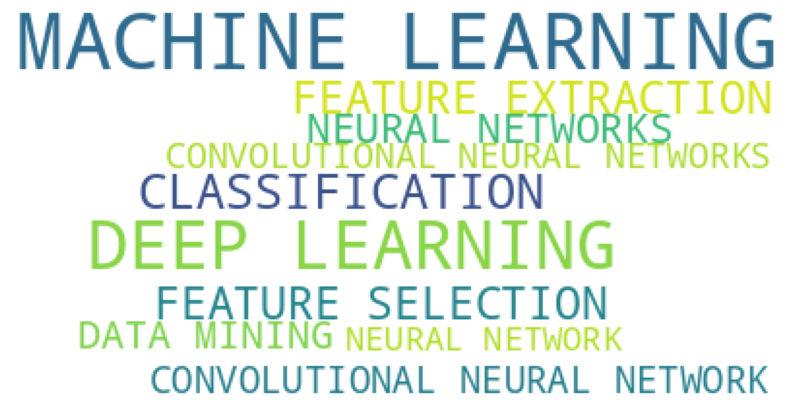

In [60]:
wc = WordCloud(background_color="white", max_font_size=60)

cloud = wc.generate_from_frequencies(dict(result[2019]))
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [24]:
import pandas as pd

idx_list = []
idx = ''


# top k 
for i in range(k):
        idx = 'top' + ' ' + str(i)
        idx_list.append(idx)

temp_list = []
y = fos_year[0]
for i in range(len(result[y])):
        temp_temp = list(result[y][i])
        temp_list.append(temp_temp)
result_df = pd.DataFrame(temp_list, columns=[[y,y],['keyword', 'counts']], index = idx_list)
        

# multi column 만들기
for y in fos_year[1:]:
    
    temp_list = []
    
    for i in range(len(result[y])):
        temp_temp = list(result[y][i])
        temp_list.append(temp_temp)
    temp_df = pd.DataFrame(temp_list, columns=[[y,y],['keyword', 'counts']], index = idx_list)
    result_df = pd.concat([result_df, temp_df], axis=1) # column bind

result_df

2019                                 2018   
                             keyword counts                       keyword   
top 0               MACHINE LEARNING    287              MACHINE LEARNING  \
top 1                  DEEP LEARNING    208                 DEEP LEARNING   
top 2                 CLASSIFICATION     85                CLASSIFICATION   
top 3             FEATURE EXTRACTION     69             FEATURE SELECTION   
top 4              FEATURE SELECTION     68            FEATURE EXTRACTION   
top 5                NEURAL NETWORKS     60                   DATA MINING   
top 6                    DATA MINING     56               NEURAL NETWORKS   
top 7   CONVOLUTIONAL NEURAL NETWORK     51                      TRAINING   
top 8  CONVOLUTIONAL NEURAL NETWORKS     49  CONVOLUTIONAL NEURAL NETWORK   
top 9                 NEURAL NETWORK     45                  OPTIMIZATION   

                                 2017                           2016          
      counts                  keyword counts                 keyword counts   
top 0    424         MACHINE LEARNING    432        MACHINE LEARNING    283  \
top 1    327            DEEP LEARNING    280          CLASSIFICATION    193   
top 2    187           CLASSIFICATION    237       FEATURE SELECTION    157   
top 3    140       FEATURE EXTRACTION    171      FEATURE EXTRACTION    146   
top 4    123        FEATURE SELECTION    168             DATA MINING    138   
top 5    104              DATA MINING    164           DEEP LEARNING    129   
top 6     99                 TRAINING    133              CLUSTERING    118   
top 7     87          NEURAL NETWORKS    127  SUPPORT VECTOR MACHINE     90   
top 8     84             OPTIMIZATION    124         NEURAL NETWORKS     82   
top 9     83  SUPPORT VECTOR MACHINES    103            OPTIMIZATION     76   

                          2015         ...                              2004   
                       keyword counts  ...                           keyword   
top 0         MACHINE LEARNING    348  ...                    NEURAL NETWORK  \
top 1           CLASSIFICATION    244  ...                  MACHINE LEARNING   
top 2              DATA MINING    197  ...                       DATA MINING   
top 3       FEATURE EXTRACTION    184  ...            SUPPORT VECTOR MACHINE   
top 4        FEATURE SELECTION    171  ...           SUPPORT VECTOR MACHINES   
top 5               CLUSTERING    150  ...  LEARNING ARTIFICIAL INTELLIGENCE   
top 6  SUPPORT VECTOR MACHINES    135  ...                   NEURAL NETWORKS   
top 7   SUPPORT VECTOR MACHINE    114  ...               PATTERN RECOGNITION   
top 8             OPTIMIZATION    113  ...                 GENETIC ALGORITHM   
top 9          NEURAL NETWORKS    101  ...                 FEATURE SELECTION   

                                          2003          
      counts                           keyword counts   
top 0    242                    NEURAL NETWORK    194  \
top 1    207                       DATA MINING    183   
top 2    204                  MACHINE LEARNING    154   
top 3    175            SUPPORT VECTOR MACHINE    107   
top 4    121                   NEURAL NETWORKS    100   
top 5    118  LEARNING ARTIFICIAL INTELLIGENCE     82   
top 6     98                GENETIC ALGORITHMS     81   
top 7     97                       FUZZY LOGIC     79   
top 8     87               PATTERN RECOGNITION     79   
top 9     86                 GENETIC ALGORITHM     76   

                                     2002          
                                  keyword counts   
top 0                      NEURAL NETWORK    168  \
top 1                         DATA MINING    150   
top 2                    MACHINE LEARNING    128   
top 3                     NEURAL NETWORKS     91   
top 4              SUPPORT VECTOR MACHINE     80   
top 5                 PATTERN RECOGNITION     63   
top 6  LEARNING (ARTIFICIAL INTELLIGENCE)     52   
top 7                  FEATURE EXTRACTION   

In [25]:
from wordcloud import WordCloud

In [ ]:
cloud = 

In [24]:
# # keyword 보여줄 때
# df = pd.DataFrame(result)
# df

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,"(machine learning, 287)","(machine learning, 424)","(machine learning, 432)","(machine learning, 283)","(machine learning, 348)","(learning (artificial intelligence), 664)","(learning (artificial intelligence), 407)","(data mining, 411)","(machine learning, 509)","(data mining, 586)","(data mining, 1605)","(data mining, 693)","(neural network, 555)","(neural network, 466)","(neural network, 349)","(neural network, 242)","(neural network, 194)","(neural network, 168)","(neural network, 161)","(neural networks, 203)"
1,"(deep learning, 208)","(deep learning, 327)","(deep learning, 280)","(classification, 193)","(classification, 244)","(data mining, 397)","(learning artificial intelligence, 385)","(learning (artificial intelligence), 383)","(data mining, 435)","(machine learning, 562)","(machine learning, 612)","(machine learning, 561)","(data mining, 512)","(machine learning, 368)","(machine learning, 329)","(machine learning, 207)","(data mining, 183)","(data mining, 150)","(machine learning, 122)","(neural network, 190)"
2,"(classification, 85)","(classification, 187)","(classification, 237)","(feature selection, 157)","(data mining, 197)","(support vector machines, 338)","(data mining, 340)","(machine learning, 376)","(support vector machine, 404)","(neural network, 439)","(neural network, 593)","(neural network, 532)","(machine learning, 418)","(data mining, 349)","(data mining, 306)","(data mining, 204)","(machine learning, 154)","(machine learning, 128)","(data mining, 119)","(machine learning, 114)"
3,"(feature extraction, 69)","(feature selection, 140)","(feature extraction, 171)","(feature extraction, 146)","(feature extraction, 184)","(pattern classification, 338)","(support vector machines, 320)","(learning artificial intelligence, 351)","(feature extraction, 343)","(support vector machines, 364)","(feature extraction, 448)","(artificial neural networks, 420)","(support vector machine, 361)","(support vector machine, 285)","(support vector machine, 206)","(support vector machine, 175)","(support vector machine, 107)","(neural networks, 91)","(neural networks, 113)","(neural nets, 110)"
4,"(feature selection, 68)","(feature extraction, 123)","(feature selection, 168)","(data mining, 138)","(feature selection, 171)","(feature extraction, 336)","(feature extraction, 291)","(support vector machines, 319)","(support vector machines, 314)","(feature extraction, 364)","(support vector machine, 438)","(learning artificial intelligence, 391)","(support vector machines, 278)","(learning artificial intelligence, 232)","(learning artificial intelligence, 161)","(support vector machines, 121)","(neural networks, 100)","(support vector machine, 80)","(fuzzy logic, 82)","(data mining, 109)"
5,"(neural networks, 60)","(data mining, 104)","(data mining, 164)","(deep learning, 129)","(clustering, 150)","(machine learning, 324)","(machine learning, 272)","(feature extraction, 313)","(neural network, 313)","(support vector machine, 360)","(learning artificial intelligence, 399)","(support vector machine, 367)","(genetic algorithm, 273)","(support vector machines, 225)","(genetic algorithm, 157)","(learning artificial intelligence, 118)","(learning artificial intelligence, 82)","(pattern recognition, 63)","(fuzzy set theory, 82)","(learning artificial intelligence, 102)"
6,"(data mining, 56)","(neural networks, 99)","(training, 133)","(clustering, 118)","(support vector machines, 135)","(feature selection, 290)","(image classification, 221)","(classification, 207)","(learning artificial intelligence, 310)","(learning artificial intelligence, 327)","(artificial neural networks, 395)","(support vector machines, 362)","(genetic algorithms, 255)","(feature selection, 175)","(feature selection, 132)","(neural networks, 98)","(genetic algorithms, 81)","(learning (artificial intelligence), 52)","(learning artificial intelligence, 57)","(patter

## 함수로 표현

In [ ]:
# fos_list = df['fos'].unique()  이 list에서  fos 뽑기

In [75]:
# # 하나의 함수로 표현하기

# from collections import Counter
# import pandas as pd

# def top_k_keyword_extractor(df, fos, start_date, end_date, k = 10):
#     fos_df = df[df['fos'] == fos]
#     fos_df.reset_index(inplace = True, drop = True)
    
#     fos_year = sorted(fos_df['year'].unique(), reverse = True)
    
#     # find range of year
    
#     start = -100
#     end = -100
    
#     for i in range(len(fos_year)):
#         if fos_year[i] == start_date:
#             start = i
#         elif fos_year[i] == end_date:
#             end = i

#     fos_year = fos_year[end:start + 1]
    
#     # create top k keyword dictionary result
    
#     result = {}
    
#     for y in fos_year:

#         temp_df = fos_df[fos_df['year'] == y]
#         temp_df.reset_index(inplace = True, drop = True)

#         top_keyword_list = []

#         for i in range(len(temp_df)):
#             top_keyword_list.extend(temp_df['keywords'][i][1:-1].split(','))

#         # 빈 문자열 제거
#         top_keyword_list = [t for t in top_keyword_list if t]
#         empty_idx = []

#         for i in range(len(top_keyword_list)):

#             # 소문자 처리 및 "", '' 것들 지우기
#             top_keyword_list[i] = top_keyword_list[i].upper()
#             top_keyword_list[i] = top_keyword_list[i].replace('"','')
#             top_keyword_list[i] = top_keyword_list[i].replace("'","")

#             # 빈 문자열 제거
#             if top_keyword_list[i] == '':
#                 empty_idx.append(i)
#                 continue

#             # 앞 뒤로 {, } 들 지우기 (원래 dict 인 것들)
#             if top_keyword_list[i][0] == ' ':
#                 top_keyword_list[i] = top_keyword_list[i][1:]
#             if top_keyword_list[i][-1] == ' ':
#                 top_keyword_list[i] = top_keyword_list[i][:-1]

#         for i in empty_idx:
#             del top_keyword_list[i]

#         temp_dict = dict(Counter(top_keyword_list))
#         temp = sorted(temp_dict.items(), key=lambda x: x[1],reverse = True)
        
#         top_keyword_list = temp[:k] # top k keyword extraction

#         temp_result = {y:top_keyword_list}
#         result.update(temp_result)
        
#     # create result dataframe view 

#     idx_list = []
#     idx = ''

#     # top k 
#     for i in range(k):
#         idx = 'top' + ' ' + str(i)
#         idx_list.append(idx)

#     temp_list = []
    
#     # result initialization
    
#     y = fos_year[0]
    
#     for i in range(len(result[y])):
#         temp_temp = list(result[y][i])
#         temp_list.append(temp_temp)
        
#     result_df = pd.DataFrame(temp_list, columns=[[y,y],['keyword', 'counts']], index = idx_list)


#     # make multi column result df
#     for y in fos_year[1:]:

#         temp_list = []

#         for i in range(len(result[y])):
#             temp_temp = list(result[y][i])
#             temp_list.append(temp_temp)
#         temp_df = pd.DataFrame(temp_list, columns=[[y,y],['keyword', 'counts']], index = idx_list)
#         result_df = pd.concat([result_df, temp_df], axis=1) # column bind

#     return result_df

In [76]:
top_k_keyword_extractor(server_df, 'Machine learning', 2007, 2010, 10)

2010          
                                  keyword counts   
top 0                         DATA MINING    586  \
top 1                    MACHINE LEARNING    562   
top 2                      NEURAL NETWORK    439   
top 3             SUPPORT VECTOR MACHINES    364   
top 4                  FEATURE EXTRACTION    364   
top 5              SUPPORT VECTOR MACHINE    360   
top 6    LEARNING ARTIFICIAL INTELLIGENCE    327   
top 7  LEARNING (ARTIFICIAL INTELLIGENCE)    313   
top 8                   FEATURE SELECTION    290   
top 9                    FUZZY SET THEORY    256   

                                   2009          
                                keyword counts   
top 0                       DATA MINING   1605  \
top 1                  MACHINE LEARNING    612   
top 2                    NEURAL NETWORK    593   
top 3                FEATURE EXTRACTION    448   
top 4            SUPPORT VECTOR MACHINE    438   
top 5  LEARNING ARTIFICIAL INTELLIGENCE    399   
top 6        ARTIFICIAL NEURAL NETWORKS    395   
top 7           SUPPORT VECTOR MACHINES    395   
top 8                   NEURAL NETWORKS    331   
top 9                 GENETIC ALGORITHM    321   

                                   2008          
                                keyword counts   
top 0                       DATA MINING    693  \
top 1                  MACHINE LEARNING    561   
top 2                    NEURAL NETWORK    532   
top 3        ARTIFICIAL NEURAL NETWORKS    420   
top 4  LEARNING ARTIFICIAL INTELLIGENCE    391   
top 5            SUPPORT VECTOR MACHINE    367   
top 6           SUPPORT VECTOR MACHINES    362   
top 7                FEATURE EXTRACTION    348   
top 8         CLASSIFICATION ALGORITHMS    316   
top 9     ALGORITHM DESIGN AND ANALYSIS    299   

                                   2007         
                                keyword counts  
top 0                    NEURAL NETWORK    555  
top 1                       DATA MINING    512  
top 2                  MACHINE LEARNING    418  
top 3            SUPPORT VECTOR MACHINE    361  
top 4           SUPPORT VECTOR MACHINES    278  
top 5                 GENETIC ALGORITHM    273  
top 6                GENETIC ALGORITHMS    255  
top 7  LEARNING ARTIFICIAL INTELLIGENCE    251  
top 8                  FUZZY SET THEORY    241  
top 9                 FEATURE SELECTION    218

In [92]:
# 함수로 표현하기

from collections import Counter
import pandas as pd

def fos_date_range_extractor(df, fos, start_date, end_date, k = 10):
    fos_df = df[df['fos'] == fos]
    fos_df.reset_index(inplace = True, drop = True)
    
    fos_year = sorted(fos_df['year'].unique(), reverse = True)
    
    # find range of year
    
    start = -100
    end = -100
    
    for i in range(len(fos_year)):
        if fos_year[i] == start_date:
            start = i
        elif fos_year[i] == end_date:
            end = i

    fos_year = fos_year[end:start + 1]
    
    return fos_year
    
    

def top_k_keyword_extractor(df, fos, fos_year, k = 10):
    fos_df = df[df['fos'] == fos]
    fos_df.reset_index(inplace = True, drop = True)
    
    # create top k keyword dictionary result
    
    result = {}
    
    for y in fos_year:

        temp_df = fos_df[fos_df['year'] == y]
        temp_df.reset_index(inplace = True, drop = True)

        top_keyword_list = []

        for i in range(len(temp_df)):
            top_keyword_list.extend(temp_df['keywords'][i][1:-1].split(','))

        # 빈 문자열 제거
        top_keyword_list = [t for t in top_keyword_list if t]
        empty_idx = []

        for i in range(len(top_keyword_list)):

            # 소문자 처리 및 "", '' 것들 지우기
            top_keyword_list[i] = top_keyword_list[i].upper()
            top_keyword_list[i] = top_keyword_list[i].replace('"','')
            top_keyword_list[i] = top_keyword_list[i].replace("'","")

            # 빈 문자열 제거
            if top_keyword_list[i] == '':
                empty_idx.append(i)
                continue

            # 앞 뒤로 {, } 들 지우기 (원래 dict 인 것들)
            if top_keyword_list[i][0] == ' ':
                top_keyword_list[i] = top_keyword_list[i][1:]
            if top_keyword_list[i][-1] == ' ':
                top_keyword_list[i] = top_keyword_list[i][:-1]

        for i in empty_idx:
            del top_keyword_list[i]

        temp_dict = dict(Counter(top_keyword_list))
        temp = sorted(temp_dict.items(), key=lambda x: x[1],reverse = True)
        
        top_keyword_list = temp[:k] # top k keyword extraction

        temp_result = {y:top_keyword_list}
        result.update(temp_result)
        
    return result

# create result dataframe view 
def output_view_maker(result, fos_year, k):
    
    idx_list = []
    idx = ''

    # top k 
    for i in range(k):
        idx = 'top' + ' ' + str(i)
        idx_list.append(idx)

    temp_list = []
    
    # result initialization
    
    y = fos_year[0]
    
    for i in range(len(result[y])):
        temp_temp = list(result[y][i])
        temp_list.append(temp_temp)
        
    result_df = pd.DataFrame(temp_list, columns=[[y,y],['keyword', 'counts']], index = idx_list)


    # make multi column result df
    for y in fos_year[1:]:

        temp_list = []

        for i in range(len(result[y])):
            temp_temp = list(result[y][i])
            temp_list.append(temp_temp)
        temp_df = pd.DataFrame(temp_list, columns=[[y,y],['keyword', 'counts']], index = idx_list)
        result_df = pd.concat([result_df, temp_df], axis=1) # column bind

    return result_df

In [93]:
fos_year = fos_date_range_extractor(server_df, 'Machine learning', 2007, 2010, 10)

result = top_k_keyword_extractor(server_df, 'Machine learning', fos_year, 10)

output_view_maker(result, fos_year, k)

2010          
                                  keyword counts   
top 0                         DATA MINING    586  \
top 1                    MACHINE LEARNING    562   
top 2                      NEURAL NETWORK    439   
top 3             SUPPORT VECTOR MACHINES    364   
top 4                  FEATURE EXTRACTION    364   
top 5              SUPPORT VECTOR MACHINE    360   
top 6    LEARNING ARTIFICIAL INTELLIGENCE    327   
top 7  LEARNING (ARTIFICIAL INTELLIGENCE)    313   
top 8                   FEATURE SELECTION    290   
top 9                    FUZZY SET THEORY    256   

                                   2009          
                                keyword counts   
top 0                       DATA MINING   1605  \
top 1                  MACHINE LEARNING    612   
top 2                    NEURAL NETWORK    593   
top 3                FEATURE EXTRACTION    448   
top 4            SUPPORT VECTOR MACHINE    438   
top 5  LEARNING ARTIFICIAL INTELLIGENCE    399   
top 6        ARTIFICIAL NEURAL NETWORKS    395   
top 7           SUPPORT VECTOR MACHINES    395   
top 8                   NEURAL NETWORKS    331   
top 9                 GENETIC ALGORITHM    321   

                                   2008          
                                keyword counts   
top 0                       DATA MINING    693  \
top 1                  MACHINE LEARNING    561   
top 2                    NEURAL NETWORK    532   
top 3        ARTIFICIAL NEURAL NETWORKS    420   
top 4  LEARNING ARTIFICIAL INTELLIGENCE    391   
top 5            SUPPORT VECTOR MACHINE    367   
top 6           SUPPORT VECTOR MACHINES    362   
top 7                FEATURE EXTRACTION    348   
top 8         CLASSIFICATION ALGORITHMS    316   
top 9     ALGORITHM DESIGN AND ANALYSIS    299   

                                   2007         
                                keyword counts  
top 0                    NEURAL NETWORK    555  
top 1                       DATA MINING    512  
top 2                  MACHINE LEARNING    418  
top 3            SUPPORT VECTOR MACHINE    361  
top 4           SUPPORT VECTOR MACHINES    278  
top 5                 GENETIC ALGORITHM    273  
top 6                GENETIC ALGORITHMS    255  
top 7  LEARNING ARTIFICIAL INTELLIGENCE    251  
top 8                  FUZZY SET THEORY    241  
top 9                 FEATURE SELECTION    218

In [90]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def Word_cloud_maker(result, fos_year):
    wc = WordCloud(background_color="white", max_font_size=60)
    
    for y in fos_year:
        cloud = wc.generate_from_frequencies(dict(result[y]))
        print(y)
        plt.figure(figsize=(5, 2))
        plt.axis('off')
        plt.imshow(cloud)
        plt.show()

2010


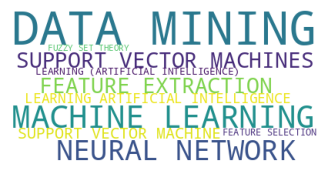

2009


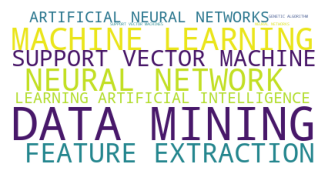

2008


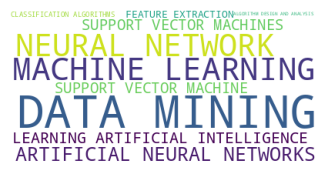

2007


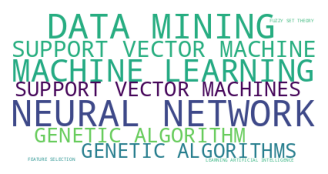

In [91]:
Word_cloud_maker(result, fos_year)

In [ ]:
# wc = WordCloud(background_color="white", max_font_size=60)

# cloud = wc.generate_from_frequencies(dict(result[2019]))
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 8))
# plt.axis('off')
# plt.imshow(cloud)
# plt.show()